<a href="https://colab.research.google.com/github/SHEHAN-120/transformers-multimodal-demo/blob/main/Transformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U transformers
!pip install -U sentencepiece
!pip install -U sacremoses

In [2]:
from transformers import pipeline
import pandas as pd

## Text Classification

In [3]:
classifier =pipeline("text-classification",model="tabularisai/multilingual-sentiment-analysis")
text="Wow ! we have come across this far."
outputs=classifier(text)
pd.DataFrame(outputs)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Device set to use cuda:0


,label,score
0,Very Positive,0.49587


## Name Entity Recognition

In [4]:
ner_tagger = pipeline("ner",aggregation_strategy="simple",model="dslim/bert-base-NER")
text="My name is Singh Shey. I'm From India."
outputs=ner_tagger(text)
pd.DataFrame(outputs)

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cuda:0


,entity_group,score,word,start,end
0,PER,0.997466,Singh Shey,11,21
1,LOC,0.992025,India,32,37


## Question Answering

In [5]:
text =""" A little bird fell from its nest during a storm, trembling on the wet ground. A kind boy picked it up gently and kept it safe in his hands until the rain stopped. When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window. """

reader=pipeline("question-answering")
question="What happened to the little bird during the storm?"

outputs=reader(question=question,context=text)
pd.DataFrame([outputs])

No model was supplied, defaulted to distilbert/distilbert-base-cased-distilled-squad and revision 564e9b5 (https://huggingface.co/distilbert/distilbert-base-cased-distilled-squad).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0


,score,start,end,answer
0,0.66631,15,33,fell from its nest


## Summarization

In [6]:
text = """ A little bird fell from its nest during a storm, trembling on the wet ground. A kind boy picked it up gently and kept it safe in his hands until the rain stopped. When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window. """
#,max_length=128,clean_up_tokenization_spaces=True
summarizer = pipeline("summarization",model="Falconsai/text_summarization")
outputs=summarizer(text)
outputs[0]['summary_text']

Device set to use cuda:0
Your max_length is set to 200, but your input_length is only 74. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=37)


'A little bird fell from its nest during a storm, trembling on the wet ground . A kind boy picked it up gently and kept it safe in his hands until the rain stopped .'

## Translation

In [7]:
text = """ A little bird fell from its nest during a storm, trembling on the wet ground. A kind boy picked it up gently and kept it safe in his hands until the rain stopped. When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window. """

translator = pipeline("translation_en_to_hi",model ="Helsinki-NLP/opus-mt-en-hi")
outputs=translator(text)
outputs

Device set to use cuda:0


[{'translation_text': 'एक छोटा पक्षी तूफान के समय अपने घोंसले से गिर गया, और एक तरह से काँप उठा ।'}]

## Text Generation

In [8]:
from transformers import set_seed
set_seed(0)

In [9]:

text = """A little bird fell from its nest during a storm, trembling on the wet ground.
A kind boy picked it up gently and kept it safe in his hands until the rain stopped.
When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window."""

generator = pipeline("text-generation", model="gpt2-large")

response = "What a sweet and heartwarming tale! 🌸 It shows how even a small act of kindness can create a lasting bond. The bird’s daily song at the boy’s window feels like a beautiful reminder that gratitude always finds its way back."

prompt = f"user: {text} Customer Service Response: {response}"

outputs = generator(prompt, max_new_tokens=256, truncation=True, pad_token_id=50256)

print(outputs[0]["generated_text"])


Device set to use cuda:0


user: A little bird fell from its nest during a storm, trembling on the wet ground.
A kind boy picked it up gently and kept it safe in his hands until the rain stopped.
When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window. Customer Service Response: What a sweet and heartwarming tale! 🌸 It shows how even a small act of kindness can create a lasting bond. The bird’s daily song at the boy’s window feels like a beautiful reminder that gratitude always finds its way back. Thank you for sharing your story.
• A little bird fell from its nest during a storm, trembling on the wet ground.
• A kind boy picked it up gently and kept it safe in his hands until the rain stopped.
When the clouds cleared, the bird flew back to the sky, but from that day onward it returned every morning to sing at his window. Customer Service Response: What a sweet and heartwarming tale! 🌸 It shows how even a small act of kindness can create a 

## Image Classification

In [10]:
from PIL import Image
import requests
from transformers import pipeline

In [11]:
url = "https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg"

In [12]:
image = Image.open(requests.get(url,stream=True).raw)

In [13]:
classifier =pipeline("image-classification",model="microsoft/swinv2-tiny-patch4-window16-256")
outputs=classifier(image)
outputs

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Device set to use cuda:0


[{'label': 'Egyptian cat', 'score': 0.898965060710907},
 {'label': 'tabby, tabby cat', 'score': 0.03120442107319832},
 {'label': 'tiger cat', 'score': 0.008338786661624908},
 {'label': 'lynx, catamount', 'score': 0.0014311234699562192},
 {'label': 'Siamese cat, Siamese', 'score': 0.0004918581689707935}]

## Image Segmentation

In [14]:
url ="https://img.freepik.com/free-photo/young-bearded-man-with-striped-shirt_273609-5677.jpg"

In [15]:
image=Image.open(requests.get(url,stream=True).raw)

In [16]:
segmenter=pipeline("image-segmentation",model="mattmdjaga/segformer_b2_clothes")
outputs=segmenter(image)
outputs

/usr/local/lib/python3.12/dist-packages/transformers/image_processing_base.py:417: UserWarning: The following named arguments are not valid for `SegformerImageProcessor.__init__` and were ignored: 'reduce_labels'
  image_processor = cls(**image_processor_dict)
Device set to use cuda:0


[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=626x417>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=626x417>}]

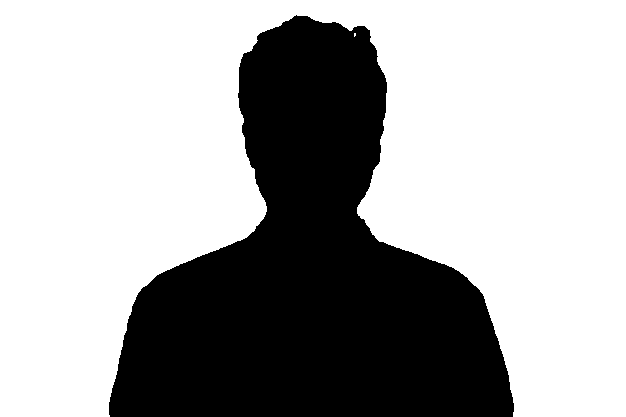

In [17]:
outputs[0]['mask']

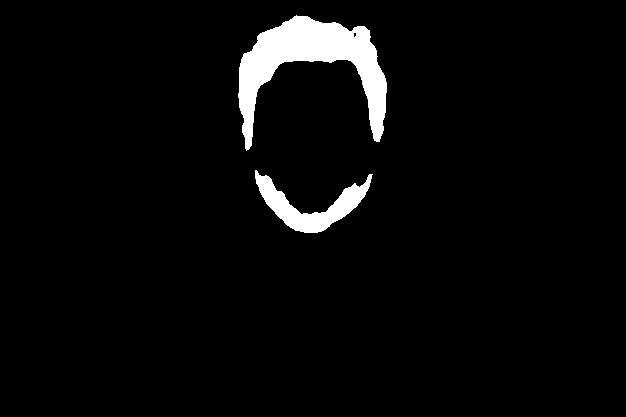

In [18]:
outputs[1]['mask']

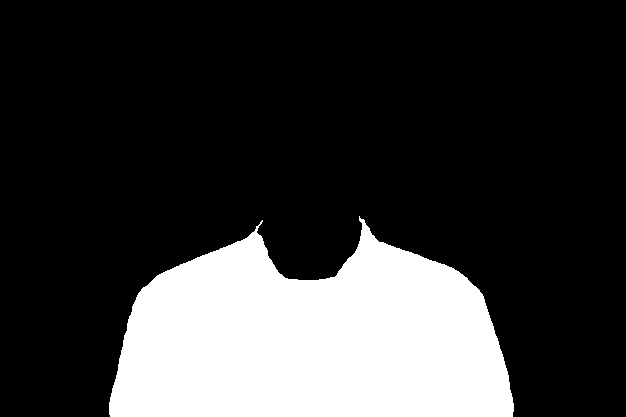

In [19]:
outputs[2]['mask']

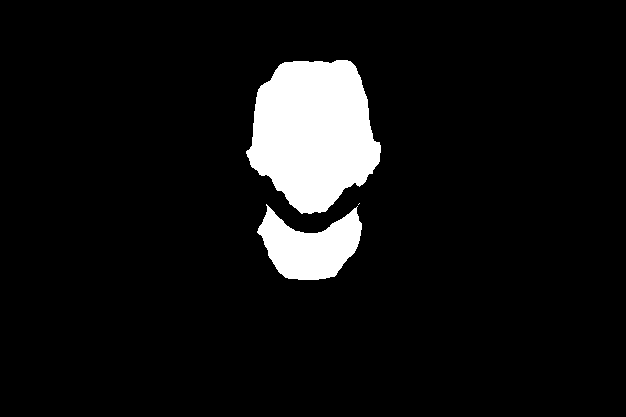

In [20]:
outputs[3]['mask']

## Text to Speech

In [21]:
import soundfile as sf

In [22]:
text = """ OpenAI has finalized a secondary share sale totaling $6.6 billion, allowing current and former employees to sell stock at a record $500 billion valuation, according to a person familiar with the transaction. """

synth=pipeline("text-to-speech")
speech=synth(text)
speech

No model was supplied, defaulted to suno/bark-small and revision 1dbd7a1 (https://huggingface.co/suno/bark-small).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use cuda:0
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:10000 for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


{'audio': array([[0.00101457, 0.00073062, 0.00071359, ..., 0.00023607, 0.00023771,
         0.00023659]], dtype=float32),
 'sampling_rate': 24000}

In [23]:
sf.write("speech.wav",speech["audio"].T,samplerate=speech['sampling_rate'])

## Text to Music Generation

In [24]:
synth=pipeline("text-to-audio","facebook/musicgen-small")
text="a chill song with influences from lofi,chillstep and downtempo"
music=synth(text,forward_params={"do_sample":True})

Device set to use cuda:0


In [25]:
import scipy
scipy.io.wavfile.write("music.wav",rate=music["sampling_rate"],data=music["audio"])